# Importar librerías y leer archivo csv para guardarlo en la variable "data"

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

url = "https://data.insideairbnb.com/spain/islas-baleares/menorca/2024-06-30/visualisations/listings.csv"
data = pd.read_csv(url)

data_with_license = data[pd.notna(data['license'])]
data_without_license = data[pd.isna(data['license'])]

# **APARTADO 1**

## **1. Valors mínim i màxim i histograma de cada una de les dues variables. Si l'histograma no mostra bé la informació, genera'n un altre que se centri en l'interval més significatiu (perquè concentri la majoria de dades).**

Alojamientos CON licencia:
Precio mínimo:  10.0
Precio máximo:  2336.0

Número de valoraciones mínimo:  0
Número de valoraciones máximo:  356
---------------------------------------------

Alojamientos SIN licencia:
Precio mínimo:  10.0
Precio máximo:  9999.0

Número de valoraciones mínimo:  0
Número de valoraciones máximo:  289


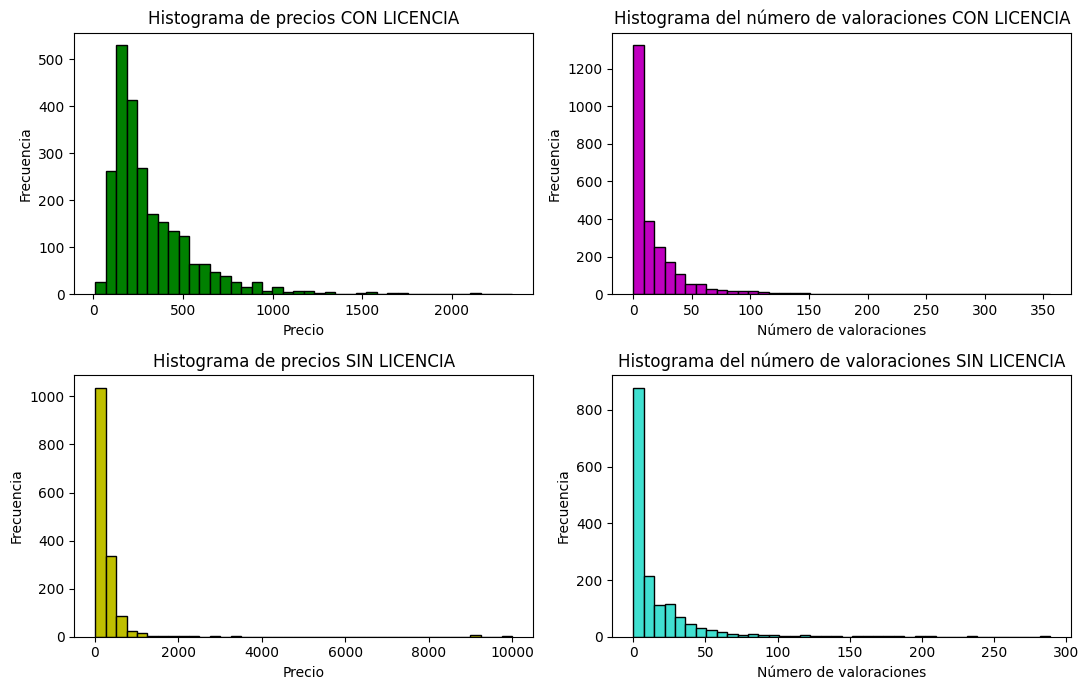

In [ ]:
print('Alojamientos CON licencia:')
print("Precio mínimo: ", np.min(data_with_license.price))
print("Precio máximo: ", np.max(data_with_license.price))
print()
print("Número de valoraciones mínimo: ", np.min(data_with_license.number_of_reviews))
print("Número de valoraciones máximo: ", np.max(data_with_license.number_of_reviews))
print('---------------------------------------------')
print('\nAlojamientos SIN licencia:')
print("Precio mínimo: ", np.min(data_without_license.price))
print("Precio máximo: ", np.max(data_without_license.price))
print()
print("Número de valoraciones mínimo: ", np.min(data_without_license.number_of_reviews))
print("Número de valoraciones máximo: ", np.max(data_without_license.number_of_reviews))

fig, axes = plt.subplots(2, 2, figsize=(11, 7))

# Histograma precio CON licencia
_ = axes[0,0].hist(data_with_license.price, bins=40, color='g', edgecolor='black')
axes[0,0].set_title('Histograma de precios CON LICENCIA')
axes[0,0].set_xlabel('Precio')
axes[0,0].set_ylabel('Frecuencia')

# Histograma número valoraciones CON licencia
_ = axes[0,1].hist(data_with_license.number_of_reviews, bins=40, color='m', edgecolor='black')
axes[0,1].set_title('Histograma del número de valoraciones CON LICENCIA')
axes[0,1].set_xlabel('Número de valoraciones')
axes[0,1].set_ylabel('Frecuencia')

# Histograma precio SIN licencia
_ = axes[1,0].hist(data_without_license.price, bins=40, color='y', edgecolor='black')
axes[1,0].set_title('Histograma de precios SIN LICENCIA')
axes[1,0].set_xlabel('Precio')
axes[1,0].set_ylabel('Frecuencia')

# Histograma número valoraciones SIN licencia
_ = axes[1,1].hist(data_without_license.number_of_reviews, bins=40, color='turquoise', edgecolor='black')
axes[1,1].set_title('Histograma del número de valoraciones SIN LICENCIA')
axes[1,1].set_xlabel('Número de valoraciones')
axes[1,1].set_ylabel('Frecuencia')

plt.tight_layout()

A simple vista notamos que los máximos y mínimos de los precios en ambos tipos de alojamientos son dispares, esto provoacrá una alta varianza que comprobaremos en los próximos ejercicios al entrar en detalle. Sin embargo al revisar la información del histograma podemos ver que la mayoría de los precios se mueven en rangos bajos y medios entre 10€ y 500€ ya que son simplemente unos pocos casos los apartamentos de alto coste. Además es interesante y curioso ver como los dos apartamentos más caros no tienen licencia, toda esta información no la podríamos obtener simplemetne de los mínimos y máximos de las variables.

En lo referente al número de valoraciones, los dos histogramas siguen una relación lineal parecida. Se refleja que los alojamientos con licencia cuentan con más frecuencia de valoraciones en los rangos bajos, pero por el otro lado
se puedn ver algunos rangos más altos en los alojamientos sin licencia. Como conclusión puedo sacar que los alojamientos con licencia son más visitados pero tienen menos reseñas.

## **2. Mitjana, moda, mediana i percentils 25 i 75 de cada variable**


In [ ]:
# Alojamientos CON licencia - Precios
average_license_price = np.mean(data_with_license.price.dropna())
mode_license_price = stats.mode(data_with_license.price.dropna())
median_license_price = np.median(data_with_license.price.dropna())

# Alojamientos CON licencia - Número de valoraciones
average_license_reviews = np.mean(data_with_license.number_of_reviews.dropna())
mode_license_reviews = stats.mode(data_with_license.number_of_reviews.dropna())
median_license_reviews = np.median(data_with_license.number_of_reviews.dropna())

# Alojamientos SIN licencia - Precios
average_no_license_price = np.mean(data_without_license.price.dropna())
mode_no_license_price = stats.mode(data_without_license.price.dropna())
median_no_license_price = np.median(data_without_license.price.dropna())

# Alojamientos SIN licencia - Número de valoraciones
average_no_license_reviews = np.mean(data_without_license.number_of_reviews.dropna())
mode_no_license_reviews = stats.mode(data_without_license.number_of_reviews.dropna())
median_no_license_reviews = np.median(data_without_license.number_of_reviews.dropna())

print('Alojamientos CON licencia:')
print("\tPrecio - promedio: ", average_license_price)
print(f"\tPrecio - moda: {mode_license_price.mode} ({mode_license_price.count} veces)")
print("\tPrecio - mediana: ", median_license_price)
print("\tPrecio - percentil 25: ", np.percentile(data_with_license.price.dropna(), 25))
print("\tPrecio - percentil 75: ", np.percentile(data_with_license.price.dropna(), 75))
print()
print("\tNúmero de valoraciones - promedio: ", average_license_reviews)
print(f"\tNúmero de valoraciones - moda: {mode_license_reviews.mode} ({mode_license_reviews.count} veces)")
print("\tNúmero de valoraciones - mediana: ", median_license_reviews)
print("\tNúmero de valoraciones - percentil 25: ", np.percentile(data_with_license.number_of_reviews.dropna(), 25))
print("\tNúmero de valoraciones - percentil 75: ", np.percentile(data_with_license.number_of_reviews.dropna(), 75))
print('---------------------------------------------')
print('\nAlojamientos SIN licencia:')
print("\tPrecio - promedio: ", average_no_license_price)
print(f"\tPrecio - moda: {mode_no_license_price.mode} ({mode_no_license_price.count} veces)")
print("\tPrecio - mediana: ", median_no_license_price)
print("\tPrecio - percentil 25: ", np.percentile(data_without_license.price.dropna(), 25))
print("\tPrecio - percentil 75: ", np.percentile(data_without_license.price.dropna(), 75))
print()
print("\tNúmero de valoraciones - promedio: ", average_no_license_reviews)
print(f"\tNúmero de valoraciones - moda: {mode_no_license_reviews.mode} ({mode_no_license_reviews.count} veces)")
print("\tNúmero de valoraciones - mediana: ", median_no_license_reviews)
print("\tNúmero de valoraciones - percentil 25: ", np.percentile(data_without_license.number_of_reviews.dropna(), 25))
print("\tNúmero de valoraciones - percentil 75: ", np.percentile(data_without_license.number_of_reviews.dropna(), 75))

Alojamientos CON licencia:
	Precio - promedio:  324.31565967940816
	Precio - moda: 200.0 (27 veces)
	Precio - mediana:  240.0
	Precio - percentil 25:  161.0
	Precio - percentil 75:  419.0

	Número de valoraciones - promedio:  17.75528098844161
	Número de valoraciones - moda: 0 (528 veces)
	Número de valoraciones - mediana:  7.0
	Número de valoraciones - percentil 25:  1.0
	Número de valoraciones - percentil 75:  23.0
---------------------------------------------

Alojamientos SIN licencia:
	Precio - promedio:  320.43138542350624
	Precio - moda: 120.0 (24 veces)
	Precio - mediana:  191.0
	Precio - percentil 25:  140.0
	Precio - percentil 75:  307.0

	Número de valoraciones - promedio:  15.29662635264163
	Número de valoraciones - moda: 0 (381 veces)
	Número de valoraciones - mediana:  5.0
	Número de valoraciones - percentil 25:  1.0
	Número de valoraciones - percentil 75:  20.0


En los alojamientos con licencia, el precio promedio es de unos 324€,mientras que en los sin licencia es un poco menor, alrededor de 320€. La mediana también refleja esta diferencia: 240 para los alojamientos con licencia frente a 191 para los sin licencia. Esto sugiere que los alojamientos con licencia tienden a tener precios más altos, aunque la diferencia no es muy grande. Además, los percentiles nos aportan información exponiendo que los precios de los alojamientos con licencia son muy variados, aunque el 75% de los precios se mantienen por debajo de 419€.

En cuanto a las valoraciones, los alojamientos con licencia tienen un promedio de 17'75 valoraciones, frente a 15'3 en los sin licencia. Sin embargo, en ambos casos, la mayoría de los alojamientos tienen pocas o ninguna valoración ya que la moda es 0, aunque los alojamientos con licencia parecen tener un poco más de visibilidad o popularidad, dado que tienen más valoraciones en promedio. Por último, destacar que la mediana de los alojaminetos con licencia está en 7, por lo que la mitad de las propiedades tienen menos de esta cantidad de reseñas.

En resumen, los alojamientos con licencia parecen tener precios un poco más altos y ligeramente más valoraciones en comparación con los sin licencia, aunque las diferencias no son demasiado marcadas. Esto podría indicar que los alojamientos con licencia, aunque son más caros en el promedio, también logran captar algo más de atención o confianza de los clientes, lo que podría explicarse en parte por el ligero aumento en el número de valoraciones. Sin embargo, el hecho de que la moda de las valoraciones sea 0 en ambos casos expresa que muchos alojamientos tienen baja visibilidad y popularidad en genreal.

## **3. Desviació estàndard i variància de cada variable**

In [ ]:
# Alojamientos CON licencia - Precios
std_license_price = np.std(data_with_license.price)
var_license_price = np.var(data_with_license.price)
# Alojamientos CON licencia - Número de valoraciones
std_license_reviews = np.std(data_with_license.number_of_reviews)
var_license_reviews = np.var(data_with_license.number_of_reviews)

# Alojamientos SIN licencia - Precios
std_no_license_price = np.std(data_without_license.price)
var_no_license_price = np.var(data_without_license.price)
# Alojamientos SIN licencia - Número de valoraciones
std_no_license_reviews = np.std(data_without_license.number_of_reviews)
var_no_license_reviews = np.var(data_without_license.number_of_reviews)

print('Alojamientos CON licencia:')
print("\tPrecio - desviación estándar: ", std_license_price)
print("\tPrecio - varianza: ", var_license_price)
print()
print("\tNúmero de valoraciones - desviación estándar: ", std_license_reviews)
print("\tNúmero de valoraciones - varianza: ", var_license_reviews)
print('---------------------------------------------')
print('\nAlojamientos SIN licencia:')
print("\tPrecio - desviación estándar: ", std_no_license_price)
print("\tPrecio - varianza: ", var_no_license_price)
print()
print("\tNúmero de valoraciones - desviación estándar: ", std_no_license_reviews)
print("\tNúmero de valoraciones - varianza: ", var_no_license_reviews)

Alojamientos CON licencia:
	Precio - desviación estándar:  250.97858746505452
	Precio - varianza:  62990.25136595402

	Número de valoraciones - desviación estándar:  28.814256126589658
	Número de valoraciones - varianza:  830.2613561287097
---------------------------------------------

Alojamientos SIN licencia:
	Precio - desviación estándar:  746.5163892081578
	Precio - varianza:  557286.7193563858

	Número de valoraciones - desviación estándar:  26.802787462034626
	Número de valoraciones - varianza:  718.3894157350006


En cuanto a la desviación estándar y la varianza de los precios, los alojamientos con licencia muestran una desviación estándar de aproximadamente 251€ y una varianza de 62990, lo que indica que, aunque los precios son más altos en promedio, hay una gran dispersión entre los precios de estos alojamientos. Esto significa que algunos alojamientos con licencia tienen precios mucho más elevados, lo que aumenta la varianza justo como hemos visto en el histograma del primer ejercicio.

Por otro lado, los alojamientos sin licencia muestran una desviación estándar mucho mayor, cerca de 747€, y una varianza de 557287, lo que nos sugiere que los precios son aún más variados aquí. El hecho de que haya una mayor dispersión en los precios de los alojamientos sin licencia podría ser por la presencia de alojamientos tanto muy baratos como notablemente más caros, un factor que también hemos podido observar en el histograma. Ya que los alojamientos sin licencia cuentan con los dos precios más altos.

En cuanto a las valoraciones, tanto los alojamientos con licencia como los sin licencia tienen desviaciones estándar y varianzas relativamente altas. Los alojamientos con licencia tienen una desviación estándar de 28,8 valoraciones y una varianza de 830, esto puede indicar que aunque en promedio tienen más valoraciones, existe una dispersión en la cantidad de reseñas recibidas. Por otro lado, los alojamientos sin licencia tienen una desviación estándar de 26,8 y una varianza de 718, lo que también nos muestra una variabilidad significativa, aunque ligeramente menor que la de los alojamientos con licencia.

En resumen, aunque los alojamientos con licencia tienen precios y valoraciones más consistentes en comparación con los sin licencia, ambos muestran una variabilidad a tener en cuenta. Podríamos deducir de estos datos que, aunque algunos alojamientos están bien establecidos, hay muchos otros con poca visibilidad y variabilidad.

## **4. Gràfica de punts per poder analitzar si hi ha relacions lineals entre les dues variables**

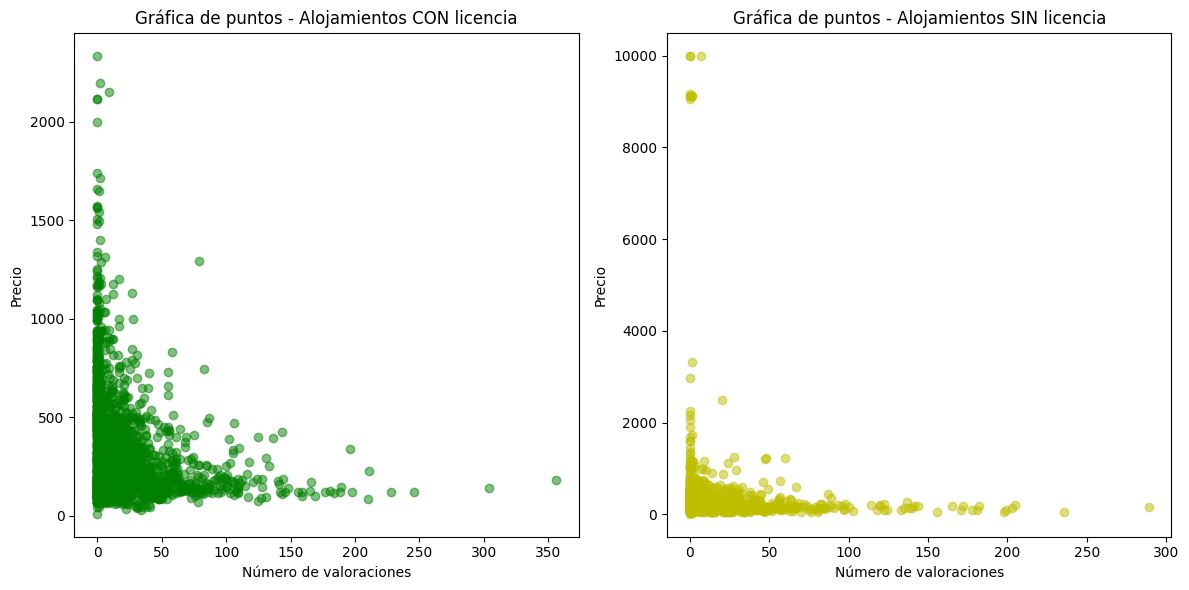

In [ ]:
fig, axes = plt.subplots(1,2, figsize=(12, 6))

axes[0].scatter(data_with_license.number_of_reviews, data_with_license.price, color='g', alpha=0.5)
axes[0].set_title('Gráfica de puntos - Alojamientos CON licencia')
axes[0].set_xlabel('Número de valoraciones')
axes[0].set_ylabel('Precio')

axes[1].scatter(data_without_license.number_of_reviews, data_without_license.price, color='y', alpha=0.5)
axes[1].set_title('Gráfica de puntos - Alojamientos SIN licencia')
axes[1].set_xlabel('Número de valoraciones')
axes[1].set_ylabel('Precio')

plt.tight_layout()
plt.show()

Observamos que los alojamientos sin licencia tienen una mayor dispersión en los precios, llegando hasta valores bastante altos (cerca de los 10.000€), mientras que los alojamientos con licencia parecen tener precios más estables, la mayoría por debajo de los 2.500€. Esta diferencia podría indicar que, aunque los precios promedio son similares, los alojamientos sin licencia tienen más extremos en cuanto a precios.

En general tienen una tendencia similar a bajar el precio a medida que las valoraciones suben, por lo que no hay una correlación clara entre un mayor número de valoraciones y un precio más alto. A partir de esto podemos deducir que el precio no es un factor clave para conseguir más reseñas.

Como conclusión podemos ver que ambos tipos de alojamiento no son muy populares o al menos no tienen mucha visibilidad. Dado que los alojamientos con licencia tienen precios un poco menos dispresos y algunas más valoraciones en promedio, esto puede sugerir que los clientes tienen preferencia o mayor confianza en estos alojamientos, pero la diferencia no es demasiado notable.

## **5. Coeficient de correlació de Pearson entre les dues possibles**

In [ ]:
data_with_license_clean = data_with_license[['price', 'number_of_reviews']].dropna()
data_without_license_clean = data_without_license[['price', 'number_of_reviews']].dropna()

corr_license = np.corrcoef(data_with_license_clean.number_of_reviews, data_with_license_clean.price)
corr_no_license = np.corrcoef(data_without_license_clean.number_of_reviews, data_without_license_clean.price)

print('Alojamientos CON licencia:')
print("\tCoeficiente de correlación de Pearson: ", corr_license[0,1])
print('---------------------------------------------')
print('\nAlojamientos SIN licencia:')
print("\tCoeficiente de correlación de Pearson: ", corr_no_license[0,1])



Alojamientos CON licencia:
	Coeficiente de correlación de Pearson:  -0.22346214170287265
---------------------------------------------

Alojamientos SIN licencia:
	Coeficiente de correlación de Pearson:  -0.08845520053990018


El coeficiente de correlación de Pearson tiene la ventaja de dar un resultado simple y fácil de analizar ya que cuanto más cercano a 0 sea el coeficiente menos correlación habrá entre las variables. Por otro lado, cuanto más cercano a 1 mayor será la relación entre ellas y en el útlimo caso cuanto más se acerque a -1 indicará una anticorrelación, se trata de una correlación de manera inversa.

En los alojamientos con licencia el coeficiente de correlación es de -0'22, este valor indica una relación negativa débil entre el número de reseñas y el precio. Es decir, a medida que aumenta el número de reseñas, el precio tiende a disminuir un poco, aunque insisto en que la relación es débil.

Por otro lado, el coeficiente de correlación en los que no tienen licencia es de -0'08. Aquí la relación también es negativa e incluso más débil. El valor cercano a 0 indica que no hay una relación clara entre el número de reseñas y el precio en los alojamientos.

Podemos sacar como conclusión que en general, ambos coeficientes indican relaciones negativas débiles entre el número de reseñas y el precio, pero como hemos visto, la relación es más débil y menos significativa en los alojamientos sin licencia.

Si los valores de correlación fueran más cercanos a -1 o 1, podríamos hablar de una relación más fuerte, ya sea negativa o positiva. En este caso, las correlaciones nos muestran que no hay una relación lineal muy clara entre las dos variables, aunque en los alojamientos con licencia parece haber una ligera tendencia a precios más bajos con más reseñas.